# Effect of Global Terrorism on Finance

## Author

<br>Takayuki Kaisen<br> <br>

ksn0215@gmail.com


# 1. Introduction to The Project

## 1.1. About Project

This project is a private project by the author.

### 1.1.1. Overview of The Project

We are living in the terrorism era. Now that terrorism attacks occur not only in the Middle East but in Paris, one on the biggest cities in Europe, and in the USA. Terrorism attacks take people's life directly, and also destroy buildings, which threatens the livelihoods of people. However, we should pay attention to another threat of terrorism. Terrorism cause people's anxiety, and as a consequence, stock price fluctuations in the market place become unstable. This instability may not be a direct threat from terrorism, but it gives a serious damage to our lives.

In my project, I will discover in what countries a terrorism occurs effects on stock price in Japan and USA. By knowing this in advance, we could predict the effect of terrorism to stock price in our country and prepare for financial crisis. By the way, how to analyse data is in thinking but I plan to use the Granger causality test or other methods for causal analysis. As for financial data, I use the Nikkei Stock Average for Japan, and Dow Jones Average for USA. 

### 1.1.2. Period

2017-05-01 - 2017-08-11

## 1.2.  Overview of The Data

### 1.2.1. Author of The Data

I use Global Terrorism Database collected by a team of University of Maryland, College Park.

### 1.2.2. Abstract of The Data

>The Global Terrorism Database (GTD) is an open-source database including information on terrorist events around the world from 1970 through 2015 (with additional annual updates planned for the future). Unlike many other event databases, the GTD includes systematic data on domestic as well as transnational and international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. For each GTD incident, information is available on the date and location of the incident, the weapons used and nature of the target, the number of casualties, and--when identifiable--the group or individual responsible.

>Statistical information contained in the Global Terrorism Database is based on reports from a variety of open media sources. Information is not added to the GTD unless and until we have determined the sources are credible. Users should not infer any additional actions or results beyond what is presented in a GTD entry and specifically, users should not infer an individual associated with a particular incident was tried and convicted of terrorism or any other criminal offense. If new documentation about an event becomes available, an entry may be modified, as necessary and appropriate.

>The National Consortium for the Study of Terrorism and Responses to Terrorism (START) makes the GTD available via this online interface in an effort to increase understanding of terrorist violence so that it can be more readily studied and defeated.

(Cited from the link below)

http://www.start.umd.edu/gtd/


# 2. Data

## 2.1. Data Read

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib
#print(matplotlib.__version__)
plt.style.use('ggplot')

In [2]:
df2 = pd.read_excel('globalterrorismdb_0616dist.xlsx',header=0)

In [4]:
#df2.head()

In [5]:
#df2_grouped = df2.groupby("country_txt")
#df2_grouped.sum()

## 2.2. Top 20 Frequency of Terrorism Incidents

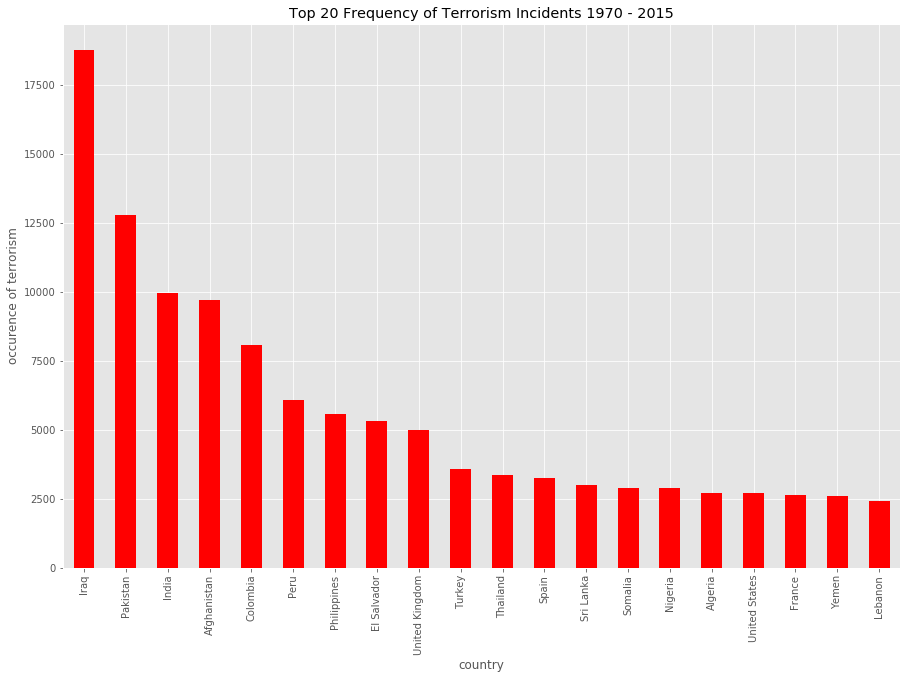

In [6]:
plt.figure(tight_layout=False)
plt.figure(figsize=(15,10))
plt.xlabel("country")
plt.ylabel("occurence of terrorism")
df2["country_txt"].value_counts()[:20].plot(kind="bar",color="red",title="Top 20 Frequency of Terrorism Incidents 1970 - 2015")

## 2.3 Time Series of The Number of Terrorism Incidents in a Few Countries Through 1970 - 2015

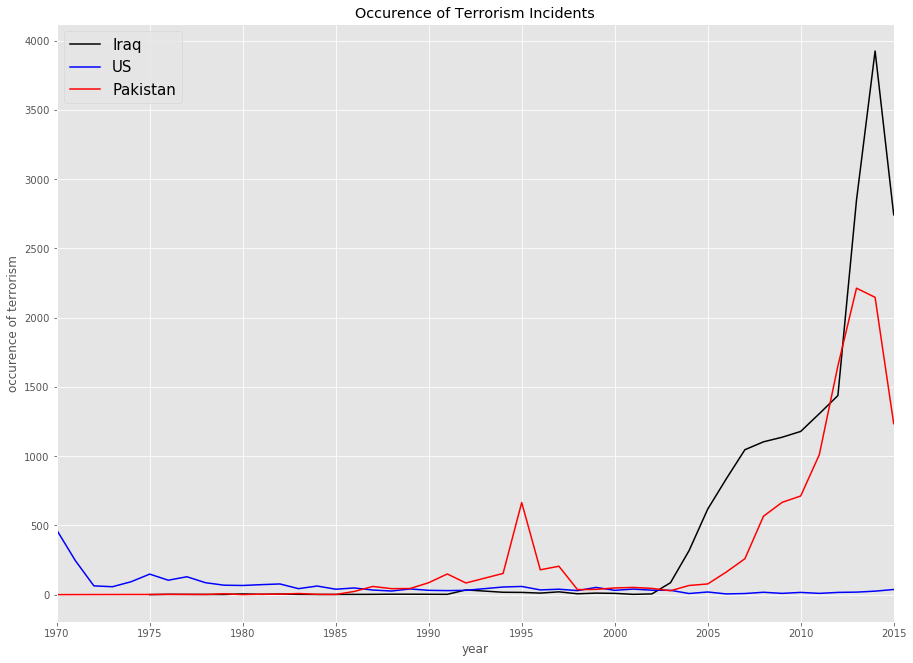

In [7]:
iraq_incidents = df2[df2["country_txt"] == "Iraq"]
us_incidents    =df2[df2["country_txt"] == "United States"]
pakistan_incidents    =df2[df2["country_txt"] == "Pakistan"]

#iraq_incidents['iyear']
#indexed_iraq = iraq_incidents.set_index([i for i in range(1970,2015)])
#indexed_iraq
iraq_incidents_count = iraq_incidents['iyear'].value_counts()
iraq_incidents_count = iraq_incidents_count.sort_index()

us_incidents_count = us_incidents['iyear'].value_counts()
us_incidents_count = us_incidents_count.sort_index()

pakistan_incidents_count = pakistan_incidents['iyear'].value_counts()
pakistan_incidents_count = pakistan_incidents_count.sort_index()

#iraq_incidents_count.to_frame
#iraq_incidents_count.colums = ["year","occurence"]
#iraq_incidents_count
#[iraq_incidents_count[i] for i in range(1970,2015)]

plt.figure(figsize=(15,11))
iraq_incidents_count.plot(color="black",title="Occurence of Terrorism Incidents",label="Iraq")
us_incidents_count.plot(color="blue", label="US")
pakistan_incidents_count.plot(color="red", label="Pakistan")

plt.legend(fontsize=15)
plt.xlabel("year")
plt.ylabel("occurence of terrorism")
plt.savefig("iraq_terrorism_occurrence")

## 2.4 Time Series of Dow Jones Industrial Average (DJIA) Stock Price Through 1970 - 2015

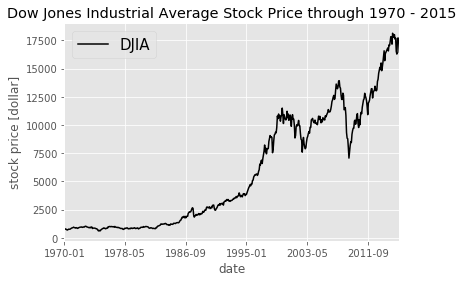

In [8]:
dji = pd.read_csv('dji_m_1970-2015.csv',header=0)
dji['Date'] = pd.core.series.Series(map(lambda s: s[:7],dji['Date']))
dji_close = dji.ix[:,['Date','Close']]
dji_close.set_index(["Date"],inplace=True)
dji_close.rename(columns={'Close':'DJIA'},inplace=True)

plt.figure(tight_layout=False)
plt.figure(figsize=(15,15))
dji_close.plot(color="black",label="DJIA")
plt.xlabel("date")
plt.ylabel("stock price [dollar]")
plt.title("Dow Jones Industrial Average Stock Price through 1970 - 2015")
plt.legend(fontsize=15)
plt.savefig("Dow_jones_1970-2015")

## 2.5 Time Series of Nikkei 225 Stock Price Through 1970 - 2015

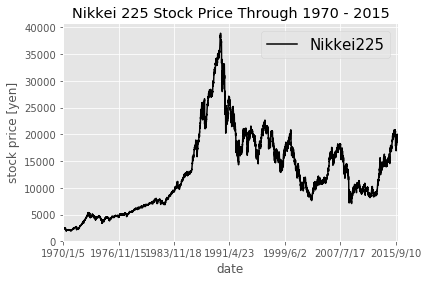

In [9]:
nikkei = pd.read_csv('nikkei_225_1970_2015.csv',header=0)
nikkei.set_index(["Date"],inplace=True)
nikkei.rename(columns={'Price': 'Nikkei225'}, inplace=True)
#plt.figure(figsize=(15,110))
nikkei.plot(color="black",label="Nikkei225")
plt.legend(fontsize=15)
plt.xlabel("date")
plt.ylabel("stock price [yen]")
plt.title("Nikkei 225 Stock Price Through 1970 - 2015")
plt.savefig("nikkei225_1970_2015")

# 3. Method

How to compute Granger Causality Test

$$ y_{it} = c_1 + \phi^{(1)}_{11} y_{1,t-1} + \phi^{(1)}_{12} y_{1,t-2} + \phi^{(2)}_{11} y_{1,t-2} + \phi^{(2)}_{12} y_{2,t-2} + \epsilon_{it}$$

Estimate parameters in VAR(2) using OLS. Let residual sum of squares be $ SSR_1$. Then, estimate parameters using OLS in the following AR model that does not have $y_{2t}$, then let residual sum of squares be $ SSR_0$

$$ y_{it} = c_1 + \phi^{(1)}_{11} y_{1,t-1} + \phi^{(2)}_{11} y_{1,t-2} + \epsilon_{it}$$

Now, F statistics is define such that

$$ F \equiv \frac{(SSR_0 - SSR_1)/2}{SSR_1/(T-5)} $$

Here, T denotes sample size. Also, 2 times of F follows $\chi^2(2)$. Therefore, if 2F is larger than 95 percentile of $\chi^2(2)$, then reject null hypothesis that Grenger causality from $y_2t$ to $y_1t$ does not exit. In cosequence, $y_{2t}$ is useful to predict the value of future $y_{1t}$.

# 4. Result

TBA

# 5. Discussion

TBA

# Reference

National Consortium for the Study of Terrorism and Responses to Terrorism (START). (2016). Global Terrorism Database [Data file]. Retrieved from https://www.start.umd.edu/gtd